**ML Techiques LAB - 2**


**Exercise 1:** Use the 'data1.csv' to build a simple linear regression from scratch without using sklearn libraries and print the RMSE and mean absolute error values.


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data1.csv')
data

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93
...,...,...
115,14,85
116,16,66
117,16,79
118,18,77


In [3]:
x = data['x']
y = data['y']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       120 non-null    int64
 1   y       120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


Using 'y = b0 + (b1 * x)', and partial derivation to find values of 'b0' and 'b1' for minimum value of SSE.


In [4]:
def simple_linear_regression(x, y):
    n = len(x)

    # Sum(x * y)
    xy_sum = 0
    for i in range(n):
        xy_sum += x.iloc[i] * y.iloc[i]

    # Sum(x^2)
    xSq_sum = 0
    for i in range(n):
        xSq_sum += x.iloc[i] * x.iloc[i]

    b1 = (xy_sum - n * x.mean() * y.mean()) / (xSq_sum - n * x.mean() * x.mean())
    b0 = y.mean() - b1 * x.mean()
    
    print("Using Direct Derivative formula to minimize Error:")
    print("Intercept, b0 =", b0)
    print("Slope, b1 =", b1)
    
    
    # Calculating the SAME parameter, 'm' using Karl-Pearson's method
    x_deviation_sq_sum = 0
    y_deviation_sq_sum = 0
    x_deviation_y_deviation_sum = 0
    for i in range(n):
        x_deviation_sq_sum += (x.iloc[i] - x.mean()) ** 2
        y_deviation_sq_sum += (y.iloc[i] - y.mean()) ** 2
        x_deviation_y_deviation_sum += (x.iloc[i] - x.mean()) * (y.iloc[i] - y.mean())
    
    # Standard Deviation of the populaton uses 'n' in the denominator.
    # If you're taking a sample of the population, use 'n-1' in the denominator.
    sx = math.sqrt((1 / n) * x_deviation_sq_sum)
    sy = math.sqrt((1 / n) * y_deviation_sq_sum)
        
    # Karl-Pearson's Correllation Coefficient
    r = x_deviation_y_deviation_sum / (math.sqrt(x_deviation_sq_sum) * math.sqrt(y_deviation_sq_sum))

    # Slope
    b1 = r * sy / sx
    
    print("\nUsing Karl-Pearson's formula:")
    print("Intercept, b0 =", b0)
    print("Slope, b1 =", b1)
    print("Correllation Coefficient, r =", r)
    print("Standard Deviation of x, sx =", sx)
    print("Standard Deviation of y, sy =", sy)
    
    return b0, b1

In [5]:
b0, b1 = simple_linear_regression(x, y)

Using Direct Derivative formula to minimize Error:
Intercept, b0 = 30.10377358490542
Slope, b1 = 3.1792452830188838

Using Karl-Pearson's formula:
Intercept, b0 = 30.10377358490542
Slope, b1 = 3.179245283018865
Correllation Coefficient, r = 0.5960947613894618
Standard Deviation of x, sx = 2.0591260281974004
Standard Deviation of y, sy = 10.982258419833329


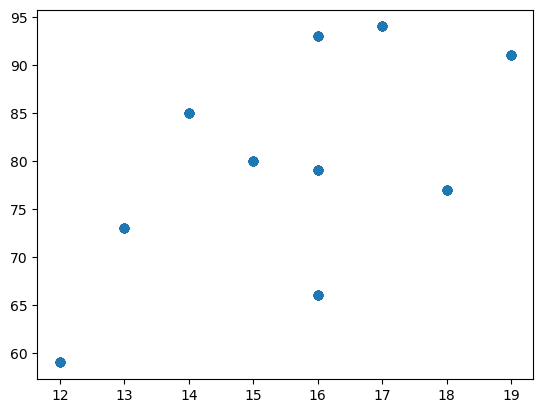

In [6]:
a = plt.scatter(x, y)
plt.show()


In [7]:
# Regression Line
yPred = b0 + b1 * x

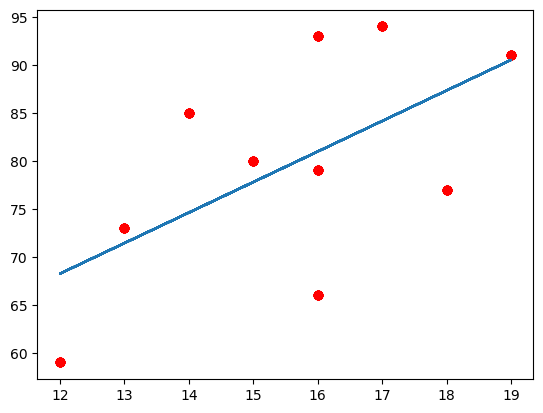

In [8]:
plt.plot(x, yPred)
plt.scatter(x, y, c='r')

In [9]:
# Error Metrics

def sum_squared_error(y, yPred):
    n = len(y)

    SSE = 0
    for i in range(n):
        SSE += (y.iloc[i] - yPred.iloc[i]) ** 2

    return SSE 

def mean_squared_error(y, yPred):
    n = len(y)

    SSE = sum_squared_error(y, yPred)
    MSE = SSE / n

    return MSE

def root_mean_squared_error(y, yPred):
    MSE = mean_squared_error(y, yPred)
    RMSE = math.sqrt(MSE)   

    return RMSE

def mean_absolute_error(y, yPred):
    n = len(y)

    MAE = 0
    for i in range(n):
        MAE += abs(y.iloc[i] - yPred[i])

    MAE /= n

    return MAE

def mean_percentage_error(y, yPred):
    if len(y) != len(yPred):
        raise Exception(f"length of 'y' & 'yPred' are not matching ({len(y), len(yPred)})")
    
    n = len(y)
    MPE = 0

    for i in range(n):
        MPE += abs(y.iloc[i] - yPred.iloc[i]) / y.iloc[i]

    MPE /= n
    MPE *= 100
    
    return MPE

In [10]:
# Error
# e = y - yPred

# Sum of Squared Errors
SSE = sum_squared_error(y, yPred)

# Mean Squared Error
MSE = mean_squared_error(y, yPred)

# Root Mean Squared Error
RMSE = root_mean_squared_error(y, yPred)

# Mean Absolute Error
MAE = mean_absolute_error(y, yPred)

# Mean Percentage Error
MPE = mean_percentage_error(y, yPred)

print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")

RMSE: 8.817810022046606
MAE: 7.3056603773585485


<h4> Using Gradient Descent </h4>

In [11]:
class LinearRegressionScratch():
    
    def __init__(self, no_of_iters=1000, learning_rate=0.001):
        self.no_of_iters = no_of_iters
        self.learning_rate = learning_rate
        self.cost_history = []
        
    
    def fit(self, x, y):
        self.m, self.n = x.shape
        
        self.x = x
        self.y = y
        
        self.b0 = 0
        self.b1 = np.zeros(self.n,)

        for _ in range(self.no_of_iters):
            self._update_weights()
            self._calculate_cost()
            
        
    def predict(self, x):
        y_pred = self.b0 + np.dot(x, self.b1)
        return y_pred
        
        
    def _update_weights(self):
        self.y_pred = self.predict(self.x)
        
        db0 = -2 * np.mean(self.y - self.y_pred)
        db1 = -2 * np.mean(self.x.T * (self.y - self.y_pred))

        self.b0 = self.b0 - self.learning_rate * db0
        self.b1 = self.b1 - self.learning_rate * db1
        
        
    def _calculate_cost(self):
        # Mean of Squared Error
        y_pred = self.predict(self.x)
        loss = np.mean((y_pred - self.y) ** 2)
        self.cost_history.append(loss)
        
    
    def get_cost(self):
        return self.cost_history
    
    
    def get_params(self):
        return self.b0, self.b1[0]
        
        
# NOTE: Cost v/s Loss
# 'loss' is the loss function, say, Binary Cross Entropy or SSE.
# 'cost' is the summation of 'loss' for all data points.

In [12]:
x = np.array(x)
y = np.array(y)

# In reshape, '-1' = Number of existing datapoints
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [13]:
model = LinearRegressionScratch(no_of_iters=500, learning_rate=0.0040)
model.fit(x, y)

y_pred = model.predict(x)

# NOTE: You may perform Hyperparameter Tuning to find optimim value for 'learning_rate'

In [14]:
cost = model.get_cost()

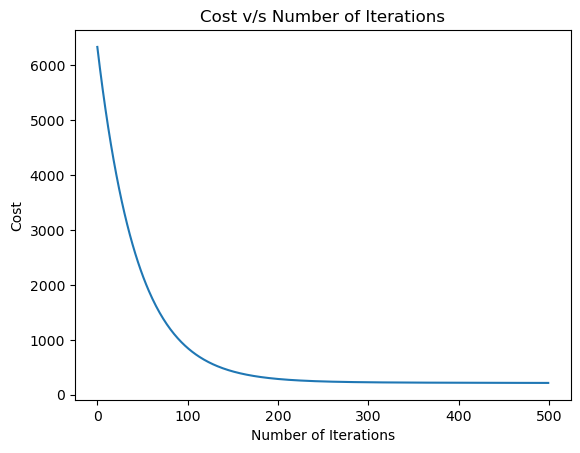

In [15]:
plt.plot(range(len(cost)), cost)

plt.title("Cost v/s Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [16]:
b0, b1 = model.get_params()

print("Using Gradient Descent:")
print("Intercept, b0 =", b0)
print("Slope, b1 =", b1)

Using Gradient Descent:
Intercept, b0 = 5.549996042277575
Slope, b1 = 4.655338681970427


In [17]:
from sklearn.metrics import mean_squared_error

print("RMSE =", math.sqrt(mean_squared_error(y, y_pred)))

# Gradient Descent gets stuck on local optimas, and is not accurate in this case.
# With larger datasets, it will be more helpful, because it takes less time for Computation.

RMSE = 9.451083558570836


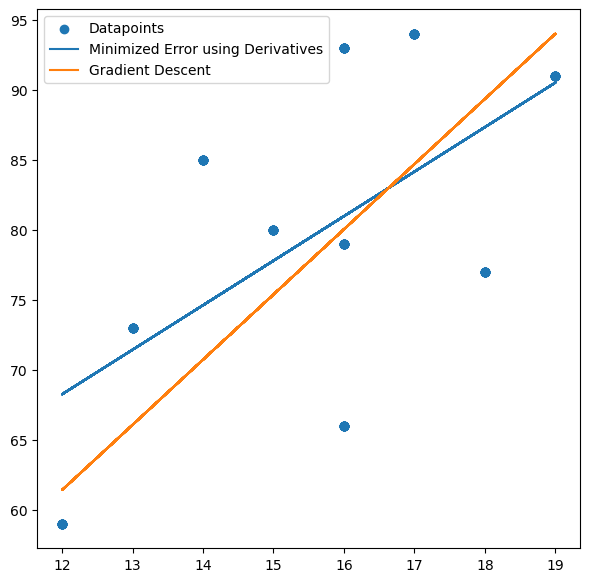

In [18]:
plt.figure(figsize=(7, 7))

plt.scatter(x, y)
plt.plot(x, yPred)
plt.plot(x, y_pred)

plt.legend(['Datapoints', 'Minimized Error using Derivatives', 'Gradient Descent'])
plt.show()

**Exercise 2:** Use the 'house_pred.csv' file to build a multiple linear regression model. 'sklearn' shall be used to fit the model. Perform necessary preprocessing and check for outliers and multi-collinearity.

Apply the same set of preprocessing to the 'test.csv' and use the data to predict the house price. The evaluation criteria will be Root Mean Squared Error.

In [19]:
import pandas as pd
data = pd.read_csv('house_pred.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
# Drop columns with majority null values
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Drop ID
data = data.drop(['Id'], axis=1)

In [22]:
obj_columns = data.select_dtypes("object").columns

In [23]:
# Remove all null values in 'object' type columns

data = data.dropna(subset=obj_columns)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<Axes: >

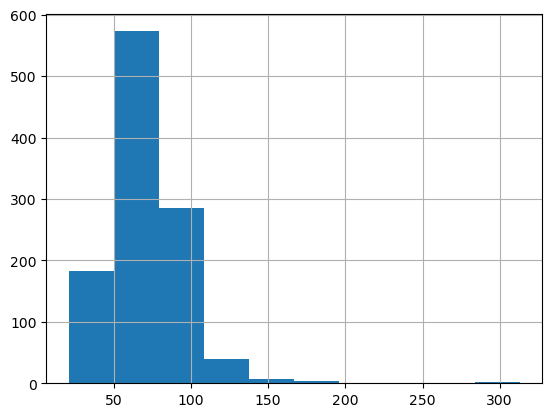

In [24]:
# Check distribution before null values inputation.
# To decide between mean(), median(), & mode().
import matplotlib.pyplot as plt
data['LotFrontage'].hist()
#data['MasVnrArea'].hist()
#data['GarageYrBlt'].hist()

In [25]:
# Fill-in null values in numeric columns
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemo

In [27]:
correll = data.corr()
correll.style.background_gradient()

/var/folders/67/4mxjfv5j26z772wt9gjhy6gw0000gn/T/ipykernel_39741/3088996658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correll = data.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.358291,-0.134158,0.051690,-0.098153,0.056456,0.038513,0.031333,-0.069053,-0.079329,-0.141025,-0.263613,-0.258787,0.306709,0.019990,0.068782,-0.011317,-0.000151,0.117720,0.197520,-0.065699,0.239177,0.014514,-0.024752,0.082040,0.006872,-0.070278,-0.010175,-0.000359,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.016283,-0.021591,-0.079599
LotFrontage,-0.358291,1.000000,0.299912,0.225596,-0.042686,0.102386,0.077667,0.176169,0.220452,0.039939,0.103538,0.378077,0.410498,0.067561,0.010364,0.362841,0.102984,-0.000881,0.172439,0.038238,0.246398,0.007758,0.320930,0.229193,0.063617,0.268588,0.332635,0.069594,0.143866,0.015055,0.064463,0.031837,0.185925,-0.000835,0.013531,0.011704,0.327834
LotArea,-0.134158,0.299912,1.000000,0.090451,0.001415,-0.005022,0.001681,0.096727,0.210148,0.110493,-0.014589,0.267188,0.288502,0.047773,0.009729,0.255445,0.160687,0.046420,0.115727,0.006052,0.120369,-0.012611,0.185654,0.263061,-0.025700,0.138228,0.168630,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.254757
OverallQual,0.051690,0.225596,0.090451,1.000000,-0.163080,0.570668,0.549460,0.401175,0.197441,-0.086014,0.292940,0.505897,0.481978,0.281145,-0.016704,0.594470,0.083254,-0.064952,0.580425,0.249283,0.081994,-0.135084,0.442941,0.377359,0.545835,0.591878,0.530092,0.218570,0.307615,-0.116931,0.026470,0.045257,0.064570,-0.029351,0.062641,-0.013949,0.783546
OverallCond,-0.098153,-0.042686,0.001415,-0.163080,1.000000,-0.417330,0.035076,-0.141080,-0.060068,0.035698,-0.161038,-0.228020,-0.144066,0.011685,0.041865,-0.093843,-0.070089,0.119671,-0.211882,-0.073568,0.023180,-0.070910,-0.063883,-0.031910,-0.336541,-0.249832,-0.204905,-0.012947,-0.060429,0.071473,0.023789,0.053759,-0.003544,0.077314,-0.011772,0.056340,-0.108627
YearBuilt,0.056456,0.102386,-0.005022,0.570668,-0.417330,1.000000,0.617156,0.299410,0.224264,-0.070403,0.147762,0.385146,0.263585,0.006989,-0.160289,0.189146,0.175108,-0.055204,0.486777,0.227626,-0.080644,-0.176124,0.099415,0.110807,0.825172,0.524076,0.443854,0.212296,0.216793,-0.385415,0.028982,-0.070809,0.001006,-0.033493,0.004396,-0.007898,0.504297
YearRemodAdd,0.038513,0.077667,0.001681,0.549460,0.035076,0.617156,1.000000,0.168311,0.099681,-0.085268,0.171881,0.264281,0.241889,0.120545,-0.064395,0.276580,0.099294,-0.023966,0.460120,0.169456,-0.074393,-0.154147,0.174660,0.089952,0.641585,0.459449,0.386213,0.201057,0.231129,-0.218452,0.039422,-0.052513,0.003354,-0.001379,0.014552,0.034503,0.501435
MasVnrArea,0.031333,0.176169,0.096727,0.401175,-0.141080,0.299410,0.168311,1.000000,0.253015,-0.083303,0.104662,0.365629,0.341001,0.169730,-0.061707,0.392006,0.078875,0.015804,0.272271,0.193268,0.108829,-0.007299,0.289758,0.229365,0.249750,0.363916,0.367237,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,-0.013461,-0.001521,0.465811
BsmtFinSF1,-0.069053,0.220452,0.210148,0.197441,-0.060068,0.224264,0.099681,0.253015,1.000000,-0.064855,-0.552809,0.505000,0.450366,-0.151876,-0.051909,0.201974,0.638094,0.057227,0.045094,-0.025251,-0.119100,-0.035623,0.046284,0.245323,0.144611,0.197559,0.284095,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,-0.021242,0.023958,0.359677
BsmtFinSF2,-0.079329,0.039939,0.110493,-0.086014,0.035698,-0.070403,-0.085268,-0.083303,-0.064855,1.000000,-0.233449,0.083184,0.094065,-0.109254,0.007072,-0.021993,0.154980,0.072813,-0.090448,-0.038494,-0.008179,-0.028278,-0.042207,0.035643,-0.092595,-0.080264,-0.053411,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.022039,0.032855,-0.031226


In [28]:
# Remove Columns with more than 60% correllation
# Do NOT compare ANY column with Sale Price Column

high_correllation_pairs = []

for i in range(len(correll) - 1):
    for j in range(len(correll) - 1):
        temp = {correll.columns[i], correll.columns[j]}

        if abs(correll.iloc[i,j]) > 0.6 and i != j and temp not in high_correllation_pairs:
            high_correllation_pairs.append(temp)

high_correllation_pairs

[{'YearBuilt', 'YearRemodAdd'},
 {'GarageYrBlt', 'YearBuilt'},
 {'GarageYrBlt', 'YearRemodAdd'},
 {'BsmtFinSF1', 'BsmtFullBath'},
 {'1stFlrSF', 'TotalBsmtSF'},
 {'2ndFlrSF', 'GrLivArea'},
 {'2ndFlrSF', 'HalfBath'},
 {'2ndFlrSF', 'TotRmsAbvGrd'},
 {'FullBath', 'GrLivArea'},
 {'GrLivArea', 'TotRmsAbvGrd'},
 {'BedroomAbvGr', 'TotRmsAbvGrd'},
 {'GarageArea', 'GarageCars'}]

In [29]:
# Columns with high correllation with other columns
# Elements = (Column Name, Correllation with Sale price)
high_correllation_columns = []

for pair in high_correllation_pairs:
    temp = list(pair)
    for col in temp:
        t = data[col].corr(data.iloc[:, -1])
        out = [col, t]
        if out not in high_correllation_columns:
           high_correllation_columns.append(out) 

# Sort by the correllation value
high_correllation_columns.sort(key=lambda a:a[1])
high_correllation_columns

[['BedroomAbvGr', 0.1692655469333125],
 ['BsmtFullBath', 0.20969465592752293],
 ['HalfBath', 0.25817492487975674],
 ['2ndFlrSF', 0.31135402669959317],
 ['BsmtFinSF1', 0.35967663312618126],
 ['GarageYrBlt', 0.48172978591824],
 ['YearRemodAdd', 0.5014353821077963],
 ['YearBuilt', 0.5042971750930905],
 ['TotRmsAbvGrd', 0.5518206950104736],
 ['FullBath', 0.5693126295659868],
 ['TotalBsmtSF', 0.6020422814414286],
 ['1stFlrSF', 0.6047144846292781],
 ['GarageArea', 0.6075353838509898],
 ['GarageCars', 0.6401543580531921],
 ['GrLivArea', 0.7117061511024302]]

In [30]:
# Remove columns with low correllation with 'y' variable, and have high correllation with other variables.
# TODO: Optimize Code here
hcp = high_correllation_pairs.copy()
tmp = hcp.copy()

while hcp:
    for col in high_correllation_columns:
        c = 0
        for j in tmp:
            if col[0] in j:
                try:
                    hcp.remove(j)
                except:
                    pass
                if c == 0:
                    data = data.drop(col[0], axis=1)
                    c+=1
        tmp = hcp.copy()

In [31]:
# Manual Method
#data = data.drop(columns=['2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBsmtSF', 'BsmtFullBath', 'YearRemodAdd'], axis=1)

In [32]:
x = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [33]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype

In [34]:
# Categorical columns = 'object' type columns 
# Make it -> 1-hot encoded

codes = pd.get_dummies(x[obj_columns], drop_first=True, dtype='int64')
x = x.join(codes)
x = x.drop(obj_columns, axis=1)
# Since there are same categories in few columns,
# 'Value = <col_name> + Value' to make categories unique
# Will be done by get_dummies() automatically

In [35]:
'''
for col in obj_columns:
    
    for i in range(len(x)):
        x[col].iloc[i] = col + x[col].iloc[i]

    # Get the 1-hot encoding for every 'object' column
    dummies = pd.get_dummies(x[col], drop_first=True)
    x = x.join(dummies)

    # Drop the old column
    x = x.drop(col, axis=1)
'''

"\nfor col in obj_columns:\n    \n    for i in range(len(x)):\n        x[col].iloc[i] = col + x[col].iloc[i]\n\n    # Get the 1-hot encoding for every 'object' column\n    dummies = pd.get_dummies(x[col], drop_first=True)\n    x = x.join(dummies)\n\n    # Drop the old column\n    x = x.drop(col, axis=1)\n"

In [36]:
x['intercept'] = 1

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 218 entries, MSSubClass to intercept
dtypes: float64(2), int64(216)
memory usage: 2.3 MB


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['variable']=x.columns

vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

/opt/homebrew/Caskroom/miniconda/base/envs/CPU/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [39]:
max_value = 0
max_column = ''
min_vif_threshold = 20

while True:
    for value in vif.values:
        if (value[1] > max_value and value[1] != vif.values[-1][1]):
            max_value = value[1]
            max_column = value[0]

    if (max_value < min_vif_threshold):
        break

    print(max_column, max_value)
    x = x.drop(max_column, axis=1)

    # Calculate VIF
    vif = pd.DataFrame()
    vif['variable']=x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    max_value = 0

Exterior1st_CBlock inf


/opt/homebrew/Caskroom/miniconda/base/envs/CPU/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


BsmtCond_Po inf
ExterCond_TA 168.58783865051637
RoofStyle_Gable 157.58797329783394
Exterior1st_VinylSd 120.5284475561901
GarageQual_TA 116.97306831784373
GarageType_Attchd 71.85166153287284
Exterior2nd_MetalSd 56.11220535765441
MSZoning_RL 53.19945108029948
SaleType_New 51.35630339930123
RoofMatl_CompShg 50.41512747099372
MSSubClass 35.55131311090059
MasVnrType_None 30.18938584705947
GarageCond_TA 26.715599951450102
Exterior2nd_CmentBd 25.751992257401476
Exterior2nd_VinylSd 23.55544650016464
1stFlrSF 22.783131741391276
Neighborhood_NAmes 20.457793652955854


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                random_state=0)


In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = reg.predict(x_test)

In [43]:
print(reg.intercept_)
print(reg.coef_)

-1222778.388331935
[ 6.62760599e+01  1.29798356e+00  8.24709967e+03  7.44072623e+03
  4.60744575e+02  1.97209049e+01  3.37303904e+01  1.77751733e+01
  1.20982212e+01 -3.66965827e+01  6.85340731e+01 -4.33797427e+03
 -1.01373216e+04  6.68152170e+02  7.19611925e+03  1.96598576e+01
  2.26502072e+01  1.22198362e+00  2.37735894e+01  4.88920541e+01
  7.69868269e+01  1.37449164e-01 -2.42805923e+02  9.01027177e+01
  1.81635197e+04  6.45260031e+03 -2.17120578e+03  6.60137536e+04
  4.31767352e+02 -9.81215726e+03 -1.10548967e+03  2.01245934e+03
 -1.54652213e+04  4.29921888e+03 -2.38906797e+04  1.09190159e+04
 -6.41372532e+03 -3.31536067e+04  1.52431836e+03  3.80156171e+03
 -1.18627802e+05  9.85111342e+03  1.56069280e+04  1.49310348e+04
  8.59089188e+02  1.26999063e+03  3.04056882e+04 -2.79059212e+03
  2.35774418e+03  1.33871385e+04  8.33983042e+03 -3.29547650e+03
  2.09967505e+04 -5.68723456e+03  2.49847991e+04  2.19077143e+04
  8.81056279e+03  7.14441027e+03  5.13546788e+03  5.96008225e+03
 -1.63

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test,y_pred)

In [45]:
import math

n = len(x)
p = len(x.columns) - 1
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("n =", n)
print("p =", p)
print("r2 =", r2)
print("adj_r2 =", adj_r2)
print("RMSE =", root_mean_squared_error(pd.Series(y_test), pd.Series(y_pred)))

n = 1338
p = 199
r2 = 0.48303978978217454
adj_r2 = 0.3926398936193035
RMSE = 54806.9987292827
